In [2]:

%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Define FrankFunction
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def FrankeFunction_noise(x,y,std):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0,0.1,len(x)*len(y))
    noise = noise.reshape(len(x),len(y))
    return term1 + term2 + term3 + term4 + (std * noise)

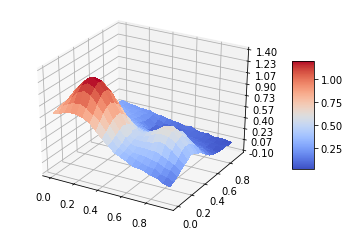

Polynomial degree: 1
MSE_train: 0.02478000218455714
MSE_test: 0.02632887078378538
R2_test: 0.6867631485244133
------------
Polynomial degree: 2
MSE_train: 0.01919196452526318
MSE_test: 0.01510860050830105
R2_test: 0.7738106502964781
------------
Polynomial degree: 3
MSE_train: 0.008234619043415131
MSE_test: 0.007217533928846878
R2_test: 0.9201362226434199
------------
Polynomial degree: 4
MSE_train: 0.003949530087638476
MSE_test: 0.00488634770496239
R2_test: 0.9458611986955081
------------
Polynomial degree: 5
MSE_train: 0.0024591928650972124
MSE_test: 0.0021931967119664967
R2_test: 0.963301998260184
------------
Polynomial degree: 6
MSE_train: 0.001268752117466297
MSE_test: 0.001651386440936893
R2_test: 0.981365208976517
------------
Polynomial degree: 7
MSE_train: 0.0016002563372716002
MSE_test: 0.0026617461916743296
R2_test: 0.9683059779092442
------------
Polynomial degree: 8
MSE_train: 0.0003628749664659562
MSE_test: 0.000855688136419481
R2_test: 0.9904810256548154
------------
Po

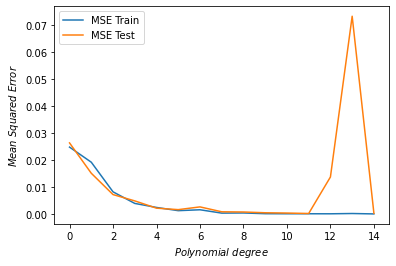

In [4]:
# OLS 
# Make data.
n = 0.05
x = np.arange(0,1,n)
y = np.arange(0,1,n)
x,y = np.meshgrid(x,y)
z = FrankeFunction_noise(x,y,std = 0.1)
# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
# Setup Matrix
z = z.ravel()
maxdegree = 15
x1 = x.ravel()
y1 = y.ravel()
X = np.vstack((x1,y1)).T
# Array to store values
msetrain = []
msetest = []
r2test = []

for i in range (maxdegree):
    degree = i + 1
    
    # Setup Design Matrix and Fit
    poly = PolynomialFeatures(degree)
    design_X = poly.fit_transform(X)
    
    # Split Dataset to Train and Test
    Xtrain, Xtest, ztrain, ztest = train_test_split(design_X, z, test_size = 0.25)
    
    # Scaling dataset
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain_sc = scaler.transform(Xtrain)
    Xtest_sc = scaler.transform(Xtest)
    
    clf = skl.LinearRegression().fit(Xtrain_sc,ztrain)
    # Train the model
    zpredict_train = clf.predict(Xtrain_sc)
    zpredict_test = clf.predict(Xtest_sc)
    # Evaluate the model
    MSE_train = MSE(ztrain,zpredict_train)
    R2_test = R2(ztest,zpredict_test)
    MSE_test = MSE(ztest, zpredict_test)
    
    msetrain.append(MSE_train)
    msetest.append(MSE_test)
    r2test.append(R2_test)
    
    print('Polynomial degree:', i+1)
    print('MSE_train:', msetrain[i])
    print('MSE_test:', msetest[i])
    print('R2_test:', r2test[i])
    print('------------')

plt.plot(msetrain, label='MSE Train')
plt.plot(msetest, label='MSE Test')
plt.legend()
plt.xlabel('$Polynomial$ $degree$')
plt.ylabel('$Mean$ $Squared$ $Error$')
plt.show()


Polynomial degree: 1
Error: 0.02331380579875778
Bias: 0.023301069093115922
Variance: 1.2736705641856333e-05
0.023313805799 >= 0.023301069093 + 1.2736706e-05 = 0.023313805799
------------
Polynomial degree: 2
Error: 0.01654761999520099
Bias: 0.016534291175964083
Variance: 1.332881923691088e-05
0.016547619995 >= 0.016534291176 + 1.3328819e-05 = 0.016547619995
------------
Polynomial degree: 3
Error: 0.007956301368397131
Bias: 0.007945056153835322
Variance: 1.124521456180921e-05
0.007956301368 >= 0.007945056154 + 1.1245215e-05 = 0.007956301368
------------
Polynomial degree: 4
Error: 0.003978540647632454
Bias: 0.003969337509413991
Variance: 9.203138218462192e-06
0.003978540648 >= 0.003969337509 + 9.203138e-06 = 0.003978540648
------------
Polynomial degree: 5
Error: 0.0022103750458889004
Bias: 0.002201889394379295
Variance: 8.485651509604322e-06
0.002210375046 >= 0.002201889394 + 8.485652e-06 = 0.002210375046
------------
Polynomial degree: 6
Error: 0.0012825070098813887
Bias: 0.001273165

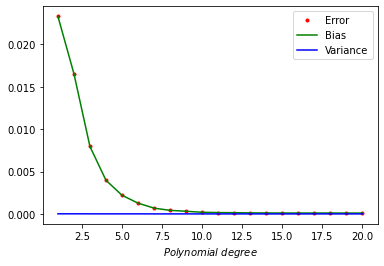

Polynomial degree: 1
Error: 0.03154547811805738
------------
Polynomial degree: 2
Error: 0.035803480412740465
------------
Polynomial degree: 3
Error: 0.012005348459739508
------------
Polynomial degree: 4
Error: 0.015133642822359027
------------
Polynomial degree: 5
Error: 0.009469287862104218
------------
Polynomial degree: 6
Error: 0.0061307887025045795
------------
Polynomial degree: 7
Error: 0.01499260629767849
------------
Polynomial degree: 8
Error: 0.025329396545308396
------------
Polynomial degree: 9
Error: 0.030827366337700057
------------
Polynomial degree: 10
Error: 0.01473555593338392
------------
Polynomial degree: 11
Error: 0.018888207579373845
------------
Polynomial degree: 12
Error: 0.03357246861660612
------------
Polynomial degree: 13
Error: 0.036444953807893976
------------
Polynomial degree: 14
Error: 0.12035716250995407
------------
Polynomial degree: 15
Error: 0.44557638824049306
------------
Polynomial degree: 16
Error: 1.8585197122056023
------------
Polynomi

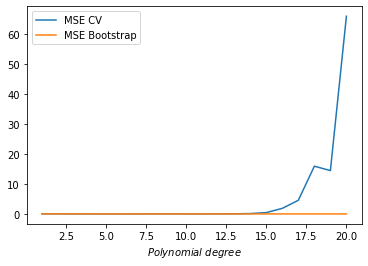

In [14]:
# OLS with Bootstrapping
# Bias-Variance Tradeoff
# Make data.
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x,y = np.meshgrid(x,y)
z = FrankeFunction_noise(x,y,std = 0.1)
z = z.ravel()
maxdegree = 20

nbootstrap = 100

# Setup Matrix
x1 = x.ravel()
y1 = y.ravel()
X = np.vstack((x1,y1)).T

# Array to store values
msetrain = []
msetest = []
r2test = []
ndegree = np.zeros(maxdegree)

bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
error = np.zeros(maxdegree)

for i in range (maxdegree):
    degree = i + 1
    
    # Setup Model and Design Matrix
    poly = PolynomialFeatures(degree)
    design_X = poly.fit_transform(X)
    
    # Split Dataset to Train and Test
    Xtrain, Xtest, ztrain, ztest = train_test_split(design_X, z, test_size = 0.25)
    
    # Scaling dataset
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain_sc = scaler.transform(Xtrain)
    Xtest_sc = scaler.transform(Xtest)
    
    zpredict_bs = np.empty((len(ztest),nbootstrap))
    
    for j in range (nbootstrap):
        X_, z_ = resample(Xtrain_sc, ztrain)
        clf = skl.LinearRegression().fit(X_,z_)
        zpredict_bs[:,j] = clf.predict(Xtest_sc).ravel()
    
    ztest = ztest.reshape(-1,1)
    error[i] = np.mean(np.mean((ztest - zpredict_bs)**2, axis=1, keepdims=True))
    bias[i] = np.mean((ztest - np.mean(zpredict_bs, axis = 1, keepdims = True)) ** 2)
    variance[i] = np.mean(np.var(zpredict_bs, axis = 1, keepdims = True))
    ndegree[i] = degree
        
    
    print('Polynomial degree:', i+1)
    print('Error:', error[i])
    print('Bias:', bias[i])
    print('Variance:', variance[i])
    print('{} >= {} + {} = {}'.format(round(error[i],12), round(bias[i],12), round(variance[i],12), round(bias[i] + variance[i], 12)))
    print('------------')
    
plt.figure()
plt.plot(ndegree, error, 'r.', label='Error')
plt.plot(ndegree, bias,'g-', label='Bias')
plt.plot(ndegree, variance,'b-', label='Variance')
plt.legend()
plt.xlabel('$Polynomial$ $degree$')
plt.show() 

#OLS with k-fold Cross Validation
k = 10
error_cv = np.zeros(maxdegree)

for i in range (maxdegree):
    degree = i + 1
    
    #Setup Design Matrix and Fit
    poly = PolynomialFeatures(degree)
    design_X = poly.fit_transform(X)
    #Using only KFold package to derive the test MSE.
    kfold = KFold(n_splits = k)
    MSE_KFold = np.zeros((k))
    
    j = 0
    
    for index_train, index_test in kfold.split(design_X):
        designX_train = design_X[index_train]
        ztrain = z[index_train]
        
        designX_test = design_X[index_test]
        ztest = z[index_test]
        
        # Scaling dataset
        scaler = StandardScaler() 
        scaler.fit(designX_train)
        Xtrain_sc = scaler.transform(designX_train)
        Xtest_sc = scaler.transform(designX_test)
        
        clf = skl.LinearRegression().fit(Xtrain_sc,ztrain)
        zpredict_cv = clf.predict(Xtest_sc)
        MSE_KFold[j] = np.sum((zpredict_cv - ztest)**2) / np.size(zpredict_cv)
        j += 1
    
    MSE_est = np.mean(MSE_KFold)
    error_cv[i] = MSE_est
    ndegree[i] = degree
    
    print('Polynomial degree:', i+1)
    print('Error:', error_cv[i])
    print('------------')
    
plt.plot(ndegree, error_cv, label='MSE CV ')   
plt.plot(ndegree, error , label='MSE Bootstrap')
#plt.plot(ndegree, bias, label='Bias')
#plt.plot(ndegree, variance, label='Variance')
plt.legend()
plt.xlabel('$Polynomial$ $degree$')
plt.show()   

In [ ]:
#Ridge regression and compare with OLS
# Make data.
n = 0.05
x = np.arange(0,1,n)
y = np.arange(0,1,n)
x,y = np.meshgrid(x,y)
z = FrankeFunction_noise(x,y,std = 0.1)
z = z.ravel()
degree = 5

# Setup Matrix
x1 = x.ravel()
y1 = y.ravel()
X = np.vstack((x1,y1)).T
# Setup Design Matrix and Fit
poly = PolynomialFeatures(degree)
design_X = poly.fit_transform(X)
# Split Dataset to Train and Test
Xtrain, Xtest, ztrain, ztest = train_test_split(design_X, z, test_size = 0.25)
# Scaling dataset
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_sc = scaler.transform(Xtrain)
Xtest_sc = scaler.transform(Xtest)
#Linear regression    
clf = skl.LinearRegression().fit(Xtrain_sc,ztrain)
        
# Train the Model
zpredict_train = clf.predict(Xtrain_sc)
zpredict_test = clf.predict(Xtest_sc)
    
MSE_train = MSE(ztrain,zpredict_train)
R2_test = R2(ztest,zpredict_test)
MSE_test = MSE(ztest, zpredict_test)

# Ridge regression
_lambda = 0.001
clf_ridge=skl.Ridge(alpha=_lambda).fit(Xtrain_sc, ztrain)
z_ridge_train = clf_ridge.predict(Xtrain_sc)
z_ridge_test = clf_ridge.predict(Xtest_sc)

MSE_ridge_train=MSE(z_ridge_train,zpredict_train)
MSE_ridge_test=MSE(ztest,z_ridge_test)
R2_test_ridge=R2(ztest,z_ridge_test)
    
print("OLS")
print('MSE_train:', MSE_train)
print('MSE_test:', MSE_test)
print('R2_test:', R2_test)
print('------------')

print("Ridge Regression")
print('MSE_ridge_train:', MSE_ridge_train)
print('MSE_ridge_test:', MSE_ridge_test)
print('R2_test_ridge:',R2_test_ridge)

OLS
MSE_train: 0.002515097639276658
MSE_test: 0.0019291495398723016
R2_test: 0.9790843135432814
------------
Ridge Regression
MSE_ridge_train: 0.00019295018305573165
MSE_ridge_test: 0.0023021827000815815
R2_test_ridge: 0.975039917577268


Polynomial degree: 1
Error: 0.02323763451958796
Bias: 0.023228292591447076
Variance: 9.341928140879439e-06
0.02323763452 >= 0.023228292591 + 9.341928e-06 = 0.02323763452
------------
Polynomial degree: 2
Error: 0.017031516541486522
Bias: 0.01701849013524779
Variance: 1.3026406238734423e-05
0.017031516541 >= 0.017018490135 + 1.3026406e-05 = 0.017031516541
------------
Polynomial degree: 3
Error: 0.007939956737045997
Bias: 0.007929303865878475
Variance: 1.065287116752052e-05
0.007939956737 >= 0.007929303866 + 1.0652871e-05 = 0.007939956737
------------
Polynomial degree: 4
Error: 0.004318531551284083
Bias: 0.004308020300176578
Variance: 1.0511251107504995e-05
0.004318531551 >= 0.0043080203 + 1.0511251e-05 = 0.004318531551
------------
Polynomial degree: 5
Error: 0.0021054623933222964
Bias: 0.0020979760596833317
Variance: 7.4863336389648206e-06
0.002105462393 >= 0.00209797606 + 7.486334e-06 = 0.002105462393
------------
Polynomial degree: 6
Error: 0.0012853271203617162
Bias: 0.00127873066

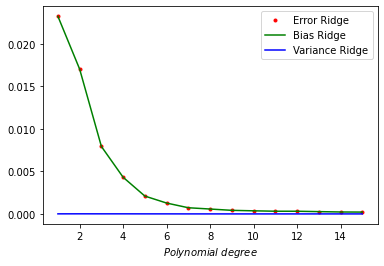

In [ ]:
# Ridge with Bootstrap 
# Bias-Variance Tradeoff as function of polynomial degree
# Make data.
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x,y = np.meshgrid(x,y)
z = FrankeFunction_noise(x,y,std = 0.1)
z = z.ravel()
maxdegree = 15

nbootstrap = 100
_lambda= 0.00001
# Setup Matrix
x1 = x.ravel()
y1 = y.ravel()
X = np.vstack((x1,y1)).T
# Array to store values
ndegree = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
error = np.zeros(maxdegree)

for i in range (maxdegree):
    degree = i + 1
    
    # Setup Model and Design Matrix
    poly = PolynomialFeatures(degree)
    design_X = poly.fit_transform(X)
    
    # Split Dataset to Train and Test
    Xtrain, Xtest, ztrain, ztest = train_test_split(design_X, z, test_size = 0.25)
    
    # Scaling dataset
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain_sc = scaler.transform(Xtrain)
    Xtest_sc = scaler.transform(Xtest)
    
    zpredict_bs = np.empty((len(ztest),nbootstrap))
    
    for j in range (nbootstrap):
        X_, z_ = resample(Xtrain_sc, ztrain)
        clf = skl.Ridge(alpha=_lambda).fit(X_,z_)
        zpredict_bs[:,j] = clf.predict(Xtest_sc).ravel()
    
    ztest = ztest.reshape(-1,1)
    error[i] = np.mean(np.mean((ztest - zpredict_bs)**2, axis=1, keepdims=True))
    bias[i] = np.mean((ztest - np.mean(zpredict_bs, axis = 1, keepdims = True)) ** 2)
    variance[i] = np.mean(np.var(zpredict_bs, axis = 1, keepdims = True))
    ndegree[i] = degree
        
    
    print('Polynomial degree:', i+1)
    print('Error:', error[i])
    print('Bias:', bias[i])
    print('Variance:', variance[i])
    print('{} >= {} + {} = {}'.format(round(error[i],12), round(bias[i],12), round(variance[i],12), round(bias[i] + variance[i], 12)))
    print('------------')
    
plt.figure()
plt.plot(ndegree, error, 'r.', label='Error Ridge')
plt.plot(ndegree, bias,'g-', label='Bias Ridge')
plt.plot(ndegree, variance,'b-', label='Variance Ridge')
plt.xlabel('$Polynomial$ $degree$')
plt.legend()
plt.show() 


Polynomial degree: 10
Lambda: 0.001
Error: 0.0009565394514721671
Bias: 0.0009516234865034818
Variance: 4.915964968685242e-06
------------
Polynomial degree: 10
Lambda: 0.0012045035402587824
Error: 0.0009931054129934567
Bias: 0.0009882854397293588
Variance: 4.819973264097991e-06
------------
Polynomial degree: 10
Lambda: 0.0014508287784959402
Error: 0.0010300449991042155
Bias: 0.0010252334881623174
Variance: 4.811510941898031e-06
------------
Polynomial degree: 10
Lambda: 0.001747528400007683
Error: 0.0010683013084860024
Bias: 0.0010634478608680727
Variance: 4.8534476179296265e-06
------------
Polynomial degree: 10
Lambda: 0.00210490414451202
Error: 0.0011075205423128939
Bias: 0.0011022236282470243
Variance: 5.296914065869425e-06
------------
Polynomial degree: 10
Lambda: 0.0025353644939701114
Error: 0.001140162762614536
Bias: 0.0011348705800866621
Variance: 5.29218252787392e-06
------------
Polynomial degree: 10
Lambda: 0.0030538555088334154
Error: 0.0011762976173705377
Bias: 0.0011712

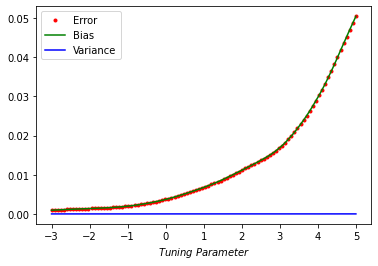

In [ ]:
# Ridge with Bootstrapping showing Bias-variance trade-off in terms of different lambda

# Make data.
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x,y = np.meshgrid(x,y)
z = FrankeFunction_noise(x,y,std = 0.1)
z = z.ravel()
#maxdegree = 6

nbootstrap = 100
k = 5

nlambdas = 100
lambdas = np.logspace(-3, 5, nlambdas)
#lambdas = [0.1, 0.01, 0.001, 0.0001, 0.00001 , 0.000001]
#lambdas = [0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005, 0.00001 , 0.00005]

# Setup Matrix
x1 = x.ravel()
y1 = y.ravel()
X = np.vstack((x1,y1)).T

# Array to store values
msetrain = []
msetest = []
r2test = []
#predtrain = np.zeros(maxdegree)
#predtest = np.zeros(maxdegree)
ndegree = np.zeros(maxdegree)

bias = np.zeros(len(lambdas))
variance = np.zeros(len(lambdas))
error = np.zeros(len(lambdas))
error_train = np.zeros(len(lambdas))
#lamda = 1

#for i in range (maxdegree):
degree = 10
    
# Setup Design Matrix and Fit
poly = PolynomialFeatures(degree)
design_X = poly.fit_transform(X)
    
# Split Dataset to Train and Test
Xtrain, Xtest, ztrain, ztest = train_test_split(design_X, z, test_size = 0.25)
    
# Scaling dataset
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_sc = scaler.transform(Xtrain)
Xtest_sc = scaler.transform(Xtest)
    
zpredict_bsr = np.empty((len(ztest),nbootstrap))
#zpredict_trainbsr = np.empty((len(ztrain),nbootstrap))   
for u, v in enumerate(lambdas):
    for j in range (nbootstrap):
        X_, z_ = resample(Xtrain_sc, ztrain)
        clf = skl.Ridge(alpha=v).fit(X_,z_)
        zpredict_bsr[:,j] = clf.predict(Xtest_sc).ravel()
        zpredict_trainbsr[:,j] = clf.predict(Xtrain_sc).ravel()
    ztest = ztest.reshape(-1,1)
    #ztrain = ztrain.reshape(-1,1)
    error[u] = np.mean(np.mean((ztest - zpredict_bsr)**2, axis=1, keepdims=True))
    #error_train[u] = np.mean(np.mean((ztrain - zpredict_trainbsr)**2, axis=1, keepdims=True))
    bias[u] = np.mean((ztest - np.mean(zpredict_bsr, axis = 1, keepdims = True)) ** 2)
    variance[u] = np.mean(np.var(zpredict_bsr, axis = 1, keepdims = True))
    #ndegree[u] = degree
        
    print('Polynomial degree:', degree)
    print('Lambda:', v)
    print('Error:', error[u])
    #print(' Train Error:',error_train[u])
    print('Bias:', bias[u])
    print('Variance:', variance[u])
    #print('{} >= {} + {} = {}'.format(error[i], bias[i], variance[i], bias[i] + variance[i]))
    print('------------')
    
plt.plot(np.log10(lambdas), error, 'r.',  label='Error')
#plt.plot(np.log10(lambdas), error_train, 'r.',  label='Error')
plt.plot(np.log10(lambdas), bias,'g-',label='Bias')
plt.plot(np.log10(lambdas), variance,'b-', label='Variance')
plt.legend()
plt.xlabel('$Tuning$ $Parameter$')
plt.show()

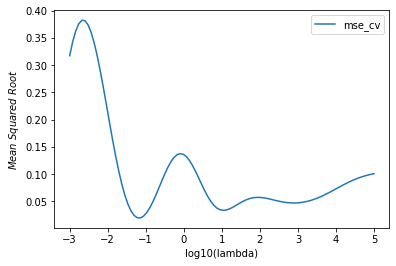

In [ ]:
# Ridge with Cross-Validation with different values of lambdas 
# Make data.
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x,y = np.meshgrid(x,y)
z = FrankeFunction_noise(x,y,std = 0.1)
z = z.ravel()
#decide degree on polynomial to fit
degree = 10
# decide lamda values
nlambdas = 100
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)
# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros(k)
# Setup Matrix
x1 = x.ravel()
y1 = y.ravel()
X = np.vstack((x1,y1)).T

# Cross-validation using cross_val_score from sklearn along with KFold
estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
# Setup Design Matrix and Fit
    poly = PolynomialFeatures(degree)
    design_X = poly.fit_transform(X)      
    estimated_mse_folds = cross_val_score(ridge, design_X, z, scoring='neg_mean_squared_error', cv=kfold)
        # cross_val_score return an array containing the estimated negative mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)
    i += 1   
#Plot mse versus log10(lamda)
plt.figure()
plt.plot(np.log10(lambdas),estimated_mse_sklearn, '-',  label='mse_cv')
plt.xlabel('log10(lambda)')
plt.ylabel('$Mean$ $Squared$ $Root$')
plt.legend()
plt.show()

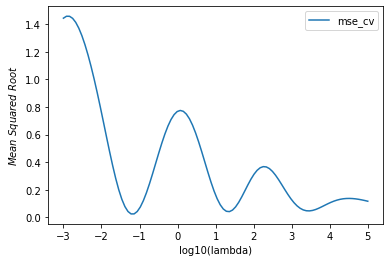

In [ ]:
# METHOD 2: Ridge with Cross-Validation with different values of lambdas 
# Make data.
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x,y = np.meshgrid(x,y)
z = FrankeFunction_noise(x,y,std = 0.1)
z = z.ravel()
#decide degree on polynomial to fit
degree = 10
# decide lamda values
nlambdas = 100
lambdas = np.logspace(-3, 5, nlambdas)
lambda_MSE=np.zeros(nlambdas)
# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)
# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros(k)
# Setup Matrix
x1 = x.ravel()
y1 = y.ravel()
X = np.vstack((x1,y1)).T
poly = PolynomialFeatures(degree)
design_X = poly.fit_transform(X)
# Cross-validation using cross_val_score from sklearn along with KFold
estimated_mse_sklearn = np.zeros(nlambdas)
for i in range (0,nlambdas):
    ridge = Ridge(alpha = lambdas[i])
    j=0
    for train_inds, test_inds in kfold.split(design_X):
        design_X_train = design_X[train_inds]
        z_train1 = z[train_inds]

        design_X_test = design_X[test_inds]
        z_test1=z[test_inds]

        #scaling in each fold
        scaler = StandardScaler()  # substract the mean value of each column an divides by it's std dev
        scaler.fit(design_X_train)
        design_X_train_scaled = scaler.transform(design_X_train)
        design_X_test_scaled = scaler.transform(design_X_test)
        # RIDGE
        ridge.fit(design_X_train_scaled,z_train1)
        zfit_predict=ridge.predict(design_X_test_scaled)
        scores_KFold[j] = np.sum((zfit_predict - z_test1)**2)/np.size(zfit_predict)
        j += 1
    estimated_mse_KFold = np.mean(scores_KFold)
    lambda_MSE[i]=estimated_mse_KFold
#Plot mse versus log10(lamda)
plt.figure()
plt.plot(np.log10(lambdas),lambda_MSE, '-',  label='mse_cv')
plt.xlabel('log10(lambda)')
plt.ylabel('$Mean$ $Squared$ $Root$')
plt.legend()
plt.show()